<a href="https://colab.research.google.com/github/Jayanth-kumar-S/project/blob/master/AMZN_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#dataset of amazon stock info 
df = web.DataReader('AMZN',data_source='yahoo',start='2012-01-01',end='2020-08-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2020-08-11,3159.219971,3073.000000,3113.199951,3080.669922,3718100,3080.669922
2020-08-12,3174.389893,3101.419922,3108.000000,3162.239990,3527200,3162.239990
2020-08-13,3217.520020,3155.000000,3182.989990,3161.020020,3149000,3161.020020


In [3]:
#Get the nuhmber of rows and columns in the data set
df.shape

(2170, 6)

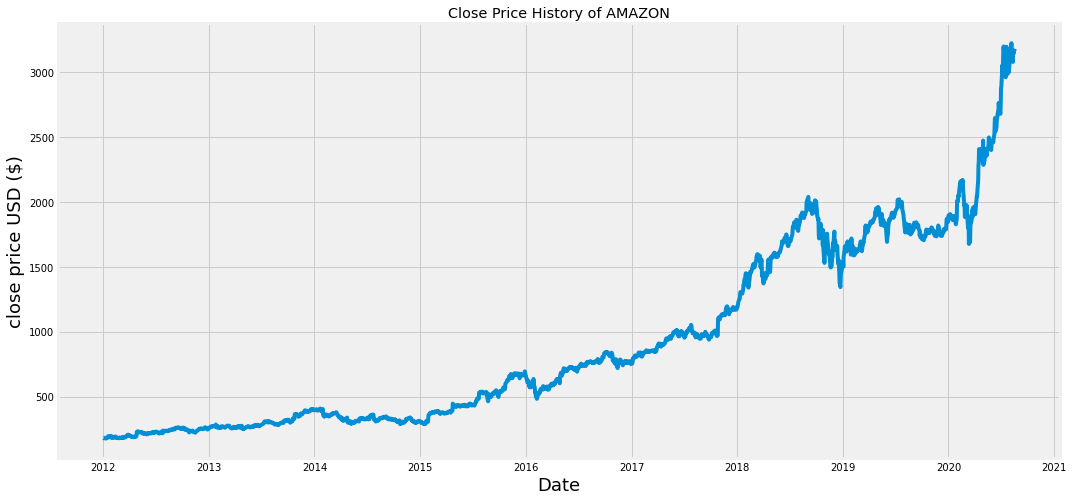

In [4]:
#Visualize the closing price history of amazon
plt.figure(figsize=(16,8))
plt.title('Close Price History of AMAZON')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('close price USD ($)',fontsize=18)
plt.show()

In [5]:
#Create a new data frame with only the 'Close column'
data = df.filter(['Close'])

#Convert the dataframe to numpy array
dataset = data.values

#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8 )

training_data_len

1736

In [6]:
#Scale the data before it presents to neural netrwork as it good practice by preprocessing the datae
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.01670545e-03],
       [5.18191392e-04],
       [5.50990279e-04],
       ...,
       [9.79016559e-01],
       [9.74752964e-01],
       [9.86031778e-01]])

In [7]:
#Create the training data set
#Crete the scaled training set
train_data = scaled_data[0:training_data_len , :]

#Split the data into x_train and _train data sets
x_train = []
y_train = []

for i in range(120, len(train_data)):
  x_train.append(train_data[i-120:i, 0])
  y_train.append(train_data[i,0])
  if i<=121:
    print(x_train)
    print(y_train)
    print()

[array([0.00101671, 0.00051819, 0.00055099, 0.00219083, 0.00086256,
       0.00111837, 0.00097407, 0.        , 0.00081664, 0.00187927,
       0.00443086, 0.00607398, 0.00491953, 0.00333216, 0.00363062,
       0.00389299, 0.00570338, 0.00637572, 0.00531966, 0.00607071,
       0.00115773, 0.00189894, 0.00385363, 0.00236466, 0.00270903,
       0.0031321 , 0.00296812, 0.00315178, 0.00513599, 0.00504088,
       0.00280086, 0.00131188, 0.00215476, 0.00207604, 0.00152506,
       0.00097079, 0.0010495 , 0.00085272, 0.00258112, 0.00123317,
       0.00134795, 0.00110526, 0.00142011, 0.00169232, 0.00257128,
       0.00384052, 0.00275166, 0.00244665, 0.00284021, 0.00207604,
       0.00278774, 0.00299108, 0.00314523, 0.00537869, 0.00518191,
       0.00540165, 0.00626749, 0.00883548, 0.00967836, 0.00827466,
       0.00940615, 0.00871741, 0.00725467, 0.0077827 , 0.00592312,
       0.00605431, 0.00522782, 0.00362406, 0.00394875, 0.00484082,
       0.00410945, 0.00313866, 0.00408649, 0.00496545, 0.0049

In [8]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1616, 120, 1)

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [11]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1616/1616 [==============================] - 68s 42ms/step - loss: 5.2229e-04


In [16]:
#Create the testing data set
#Create a new array containing scaled values from index 1616 to 2170
test_data = scaled_data[training_data_len - 120: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(120, len(test_data)):
  x_test.append(test_data[i-120:i, 0])
  


In [17]:
#Convert the data to numpy array
x_test = np.array(x_test)


In [18]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [27]:
#Get the root mean squared error (RSME)
rsme = np.sqrt( np.mean( predictions - y_test )**2 )
rsme

40.22249227075533

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


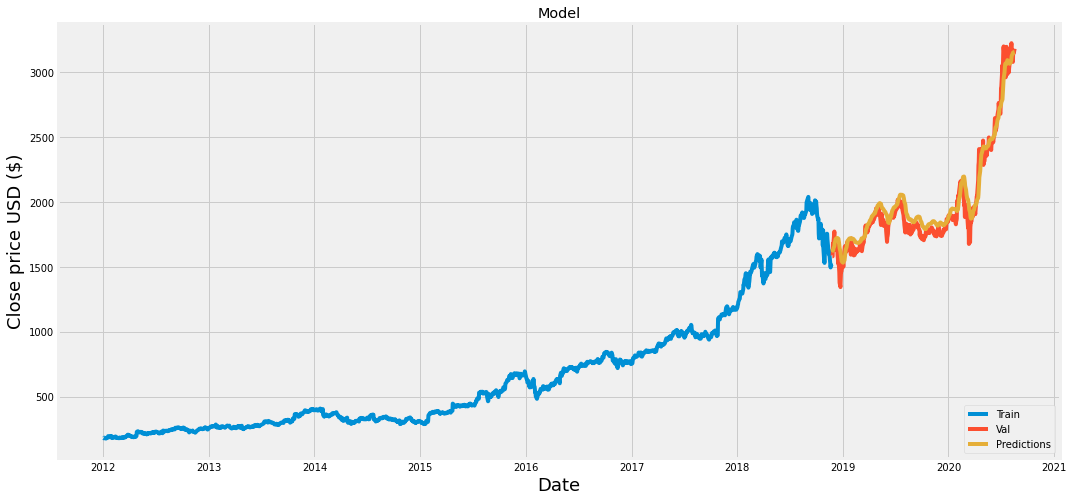

In [28]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()